## Outliers

In [1]:
# Numerical arrays.
import numpy as np

# Plotting.
import matplotlib.pyplot as plt

# Statistics.
import scipy.stats as ss

There are not many definitions of outliers. It is often easier to say what is not an outlier

https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
random.normal(loc=0.0, scale=1.0, size=None)

## The Normal distribution - Scaling
***

LaTeX programming for mathematical notation. 
Double dollar signs centre the display
Single dollar signs leave the display inline


$ \frac{1}{2} $

$ \frac{1}{\sqrt{2 \pi \sigma^{2}}} $

$$ \frac{1}{\sqrt{2 \pi \sigma^2 }} $$


In [2]:
np.pi

3.141592653589793

In [3]:
np.sqrt(2)
# both calculations give you irrational numbers, they cannot be described by one number divided by another and have infinite decimal places

1.4142135623730951

In [4]:
1.0**2
# **2 > squared
# important to be explicit with integers and floating points. Better to use 1.0 than 1

1.0

In [5]:
sigma = 1.0
sigma

1.0

In [6]:
1.0 / np.sqrt(2 *np.pi * sigma**2)

0.3989422804014327

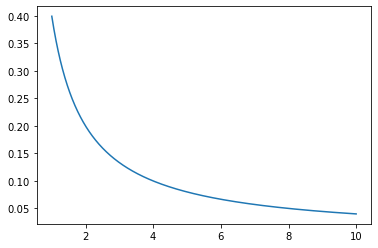

In [7]:
sigma_vals = np.linspace(1.0, 10.0, 1000) 
#  see the fencepost error, off by one error

plt.plot(sigma_vals, 1.0 / np.sqrt(2 * np.pi * sigma_vals**2));

## The Normal Distribution - the $e^x$ part

$$ e^x $$

$$ e^{-\frac{(x - \mu)^2}{2 \sigma^2}} $$

See: https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

Fix $\mu$ and $\sigma$ and vary x

In [8]:
np.e
# Euler's number, used a lot in compound interest. How often do you want to compound, keep compouding and you get e
# A mathematical constant. 

2.718281828459045

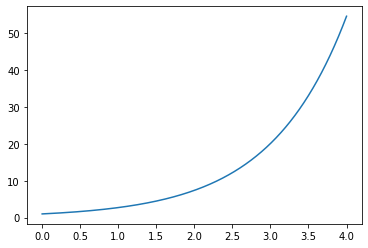

In [9]:
# Range of x values for plotting.
x = np.linspace(0.0, 4.0, 1000)

# Plot of e^x - built into numpy as np.exp.
plt.plot(x, np.exp(x));

# when x is 1, you get e 

Break down the formula into parts
$$ e^{-\frac{(x - \mu)^2}{2 \sigma^2}} $$

Let $\mu$ = 0 and $\sigma$ = 1, 

$$ e^{-\frac{(x - 0)^2}{2(1)^2}} $$

$$ e^{-\frac{(x)^2}{2}} $$


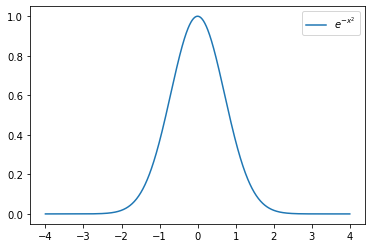

In [10]:
# Range of x values.
x = np.linspace(-4.0, 4.0, 1000)

# e to the minus x squared. 
plt.plot(x, np.exp(-(x**2)), label=r'$e^{-x^2}$') # use r for LaTeX in pyplot

# Absolute legend.
plt.legend();

Negative values when squared are positive so reflect the positive values squared. The curve peaks at 1 because e<sup>0</sup> = 1

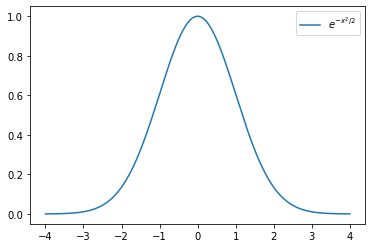

In [11]:
# Range of x values.
x = np.linspace(-4.0, 4.0, 1000)

# e to the minus x squared and divided by 2
plt.plot(x, np.exp(-(x**2 / 2)), label=r'$e^{-x^2/2}$') 

# Absolute legend.
plt.legend();

The curve seems to have widened when $e^{-x^2}$ is divided by 2

Now replace 0 for $\mu$ and 1 for $\sigma$ in the statement and supply these values to numpy. 

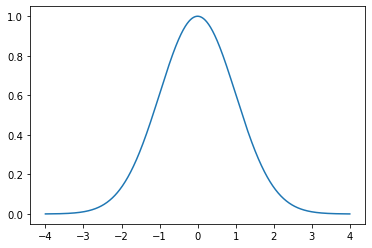

In [12]:
# These are involved in the exponent.
mu, sigma = 0.0, 1.0

# Range of x values.
x = np.linspace(-4.0, 4.0, 1000)

# Plot of full e part of normal pdf.
plt.plot(x, np.exp(-((x - mu)**2 / (2 * sigma**2))));

Changing the value of $\mu$ changes the position of the peak of the curve. Hence in `random.normal(loc=0.0, scale=1.0, size=None)`, *loc* denotes the position of the tip of the curve. 

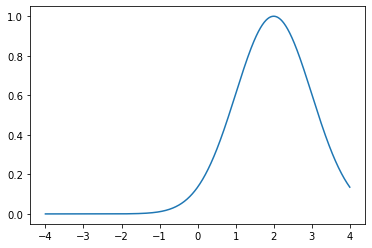

In [13]:
# These are involved in the exponent.
mu, sigma = 2.0, 1.0

# Range of x values.
x = np.linspace(-4.0, 4.0, 1000)

# Plot of full e part of normal pdf.
plt.plot(x, np.exp(-((x - mu)**2 / (2 * sigma**2))));

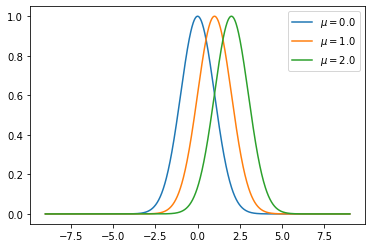

In [14]:
# These are involved in the exponent.
mu, sigma = 2.0, 1.0

# Range of x values.
x = np.linspace(-9.0, 9.0, 1000)

for mu in [0.0, 1.0, 2.0]: 
# Plot of full e part of normal pdf.
    plt.plot(x, np.exp(-((x - mu)**2 / (2 * sigma**2))), label=rf'$\mu = {mu}$');

# Plot legend
plt.legend()


Changing the value of $\sigma$ changes the width/spread of the curve.

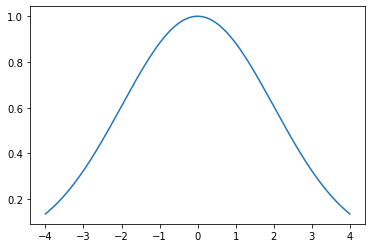

In [15]:
# These are involved in the exponent.
mu, sigma = 0.0, 2.0

# Range of x values.
x = np.linspace(-4.0, 4.0, 1000)

# Plot of full e part of normal pdf.
plt.plot(x, np.exp(-((x - mu)**2 / (2 * sigma**2))));

Changing the value of $\sigma$ changes the width/spread of the curve.
Hence in `random.normal(loc=0.0, scale=1.0, size=None)`, *scale* denotes $\sigma$

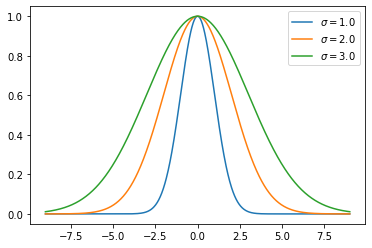

In [16]:
# These are involved in the exponent.
mu, sigma = 0.0, 2.0

# Range of x values.
x = np.linspace(-9.0, 9.0, 1000)

for sigma in [1.0, 2.0, 3.0]: 
# Plot of full e part of normal pdf.
    plt.plot(x, np.exp(-((x - mu)**2 / (2 * sigma**2))), label=rf'$\sigma = {sigma}$');
    
plt.legend();

### Normal distribution altogether

$$ \frac{1}{\sqrt{2 \pi \sigma^2 }} e^{-\frac{(x - \mu)^2}{2 \sigma^2}} $$


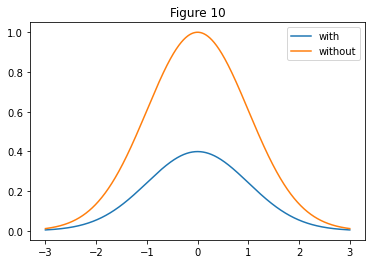

In [32]:
# Set mu and sigma.
mu, sigma = 0.0, 1.0

# Range of x values.
x = np.linspace(-3.0, 3.0, 1000)

# First part, with the square root.
part1 = 1.0 / np.sqrt(2 * np.pi * sigma**2)
# Second part, with the e.
part2 = np.exp(-((x - mu)**2 / (2 * sigma**2)))
# The output is the product.
y = part1 * part2

# Plot x and y.
plt.plot(x, y, label='with')
# Show without scaling by first part.
plt.plot(x, part2, label='without')
plt.title("Figure 10")
plt.legend();

The effect of part 1 is that is 'squishes' the orange curve so that the area of the blue curve is under 1. When you integrate the blue curve, the area will be under 1. Why would you want an area of under 1? 

Something with the probability of 1 is always going to happen.

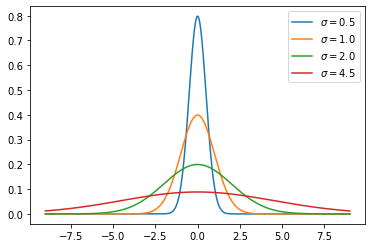

In [19]:
# Changing values of sigma.
# Note that sigma occurs in part 1 and part 2.
# So, the height of the curve is also affected.

# Set initial mu and sigma.
mu, sigma = 0.0, 1.0

# Range of x values.
x = np.linspace(-9.0, 9.0, 1000)

# Different values of sigma.
for sigma in [0.5, 1.0, 2.0, 4.5]:
    # First part, with the square root.
    part1 = 1.0 / np.sqrt(2 * np.pi * sigma**2)
    # Second part, with the e.
    part2 = np.exp(-((x - mu)**2 / (2 * sigma**2)))
    # The output is the product.
    y = part1 * part2
    # Plot x and y.
    plt.plot(x, y, label=rf'$\sigma = {sigma}$')

plt.legend();

## Percentiles

Standard Normal distribution will never be 0 - continuous probability distribution but there is a chance that you will get extreme random values e.g. from a sample of 1,000,000 values with $\mu$ = 0 and $\sigma$ = 1.0, you could get 100 as a random value and it wouldn't be an outlier. 

Use Scipy for a more indepth look at the Normal distribution 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [20]:
# Picking random values on the curve.
np.random.normal(0.0, 1.0)

0.7781128743789295

In [29]:
# Picking random values on the curve - the max of 1000000.
# Would you describe it as an outlier?
np.random.normal(0.0, 1.0, 1000000).max()

4.6585685219341055

In [31]:
#Call the scipy norm and use ppf > Percent point function (inverse of cdf — percentiles).
ss.norm().ppf(0.99)

2.3263478740408408

0.99 or the 99th percentile indicates that 99% of the blue curve in Figure 10, is to the left of the 2.326. 
If you select a number randomly from this distribution, you have a 99% chance that it is going to be less than 2.326. 


Scipy.norm Methods

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm

Percent point function (inverse of cdf — percentiles).
`ppf(q, loc=0, scale=1)` where q is the lower tail probability
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.ppf.html


Cumulative distribution function.
`cdf(x, loc=0, scale=1)` when you have a value and you want to know what percentile it falls 

See the different plots for pdf and cdg https://en.wikipedia.org/wiki/Normal_distribution

In [33]:
#Try cdf, take a percentile i.e. a value between 0 and 1
ss.norm().cdf(0.5)

0.6914624612740131

In [34]:
# The probability of generating a value less than 3.0 and greater than -3.0. 
# Cdf is the accumulation of probabilities moving across the x axis
ss.norm().cdf(3.0) - ss.norm().cdf(-3.0)

0.9973002039367398

In this instance, where $\mu$ = 0 and $\sigma$ = 1.0, the statement is asking for 3 standard deviations away from the mean. 

This always gives 99%. The criterion for a cut off when looking for an effect in statistics. 

Default settin for $\mu$ = 0 and $\sigma$ = 1.0


In [35]:
# Six sigma, where sigma is 1.0 and mu is 0.0.
ss.norm().cdf(6.0) - ss.norm().cdf(-6.0)

0.9999999980268246

Considered rock solid...approaching 100%

## Quartiles
***
Useful way of dividing into ranges. 
Four regions dividing up by 3 values. 

In [36]:
# 3rd quartile - the 75th percentile.
ss.norm().ppf(0.75)

0.6744897501960817

In [37]:
# 2nd quartile - the 50th percentile.
ss.norm().ppf(0.5)

0.0

In [38]:
# 1st quartile - the 25th percentile.
ss.norm().ppf(0.25)

-0.6744897501960817